Pearson correlation: r=-0.015, p=0.968
Spearman correlation: rs=0.190, p=0.600
Point-biserial correlation (Myoglobin vs Others): r_pb=0.850, p=0.002


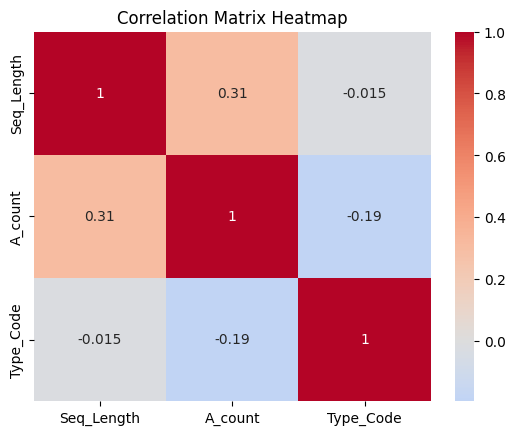

Variance Inflation Factors (VIF):
      Feature       VIF
0  Seq_Length  3.363304
1     A_count  2.557710
2   Type_Code  1.827988
Partial correlation (Seq_Length vs Type_Code controlling for A_count): 0.049


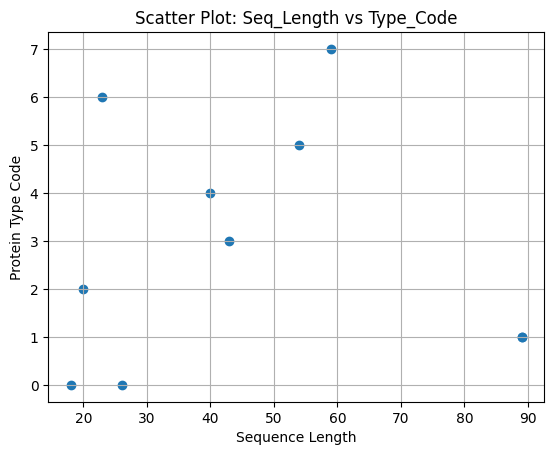

In [9]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, pointbiserialr
from statsmodels.stats.outliers_influence import variance_inflation_factor


data = {
    "Entry": ["P12345","Q67890","A13579","B24680","C98765","D19283","E37465","F85642","G56473","H29384"],
    "Sequence": [
        "MKAILVVLLYTFATANAD",
        "MGDVEKGKKIFIMKCSQCHTVEKGGKHKTGPNLHGLFGRKTGQAPGYSYTAANKNKGIIWGEDTLMEYLENPKKYIPGTKMIFAGIKKK",
        "MSRSLLLRFLLFLLLLPPLP",
        "MGSSHHHHHHSSGLVPRGSHMGDVEKGKKIFIMKCSQCHTVEK",
        "MADEEKLPPGWEKRMSRSSGRVYYFNHITNASQWERPSGN",
        "MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKA",
        "MTCRAQMLMSLDLRDTHDDELRQ",
        "MGDVEKGKKIFIMKCSQCHTVEKGGKHKTGPNLHGLFGRKTGQAPGYSYTAANKNKGIIWGEDTLMEYLENPKKYIPGTKMIFAGIKKK",
        "MKAILVVLLYTFATANADPPAGQEPF",
        "MGSSHHHHHHSSGLVPRGSHMADEEKLPPGWEKRMSRSSGRVYYFNHITNASQWERGSN"
    ],
    "Description": [
        "Pseudo protein A",
        "Myoglobin",
        "Growth hormone",
        "Green fluorescent protein",
        "Insulin",
        "Glucagon",
        "Collagen",
        "Myoglobin variant",
        "Pseudo protein B",
        "Protein X"
    ]
}

df = pd.DataFrame(data)

df['Seq_Length'] = df['Sequence'].apply(len)
df['A_count'] = df['Sequence'].apply(lambda x: x.count('A'))


type_mapping = {
    "Pseudo protein A": 0,
    "Pseudo protein B": 0,
    "Myoglobin": 1,
    "Myoglobin variant": 1,
    "Growth hormone": 2,
    "Green fluorescent protein": 3,
    "Insulin": 4,
    "Glucagon": 5,
    "Collagen": 6,
    "Protein X": 7
}
df['Type_Code'] = df['Description'].map(type_mapping)


pearson_corr, pearson_p = pearsonr(df['Seq_Length'], df['Type_Code'])
spearman_corr, spearman_p = spearmanr(df['Seq_Length'], df['Type_Code'])

print(f"Pearson correlation: r={pearson_corr:.3f}, p={pearson_p:.3f}")
print(f"Spearman correlation: rs={spearman_corr:.3f}, p={spearman_p:.3f}")


df['Is_Myoglobin'] = df['Description'].apply(lambda x: 1 if x in ["Myoglobin","Myoglobin variant"] else 0)
pb_corr, pb_p = pointbiserialr(df['Seq_Length'], df['Is_Myoglobin'])
print(f"Point-biserial correlation (Myoglobin vs Others): r_pb={pb_corr:.3f}, p={pb_p:.3f}")


corr_matrix = df[['Seq_Length','A_count','Type_Code']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix Heatmap")
plt.show()


X = df[['Seq_Length','A_count','Type_Code']]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Variance Inflation Factors (VIF):")
print(vif_data)

def partial_corr(x, y, z):
    r_xy = pearsonr(x, y)[0]
    r_xz = pearsonr(x, z)[0]
    r_yz = pearsonr(y, z)[0]
    r_xy_z = (r_xy - r_xz*r_yz) / np.sqrt((1 - r_xz**2)*(1 - r_yz**2))
    return r_xy_z


partial_corr_val = partial_corr(df['Seq_Length'], df['Type_Code'], df['A_count'])
print(f"Partial correlation (Seq_Length vs Type_Code controlling for A_count): {partial_corr_val:.3f}")


plt.scatter(df['Seq_Length'], df['Type_Code'])
plt.xlabel("Sequence Length")
plt.ylabel("Protein Type Code")
plt.title("Scatter Plot: Seq_Length vs Type_Code")
plt.grid(True)
plt.show()


In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
